In [1]:
library(tidyverse)
library(EnvStats)
list.files(path = "../input")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default




character(0)

In [2]:
#a switchboard gets 2.5 calls on average on wednesday mornings. 
#What is the probability of receiving 6 calls?
dpois((0:6), lambda = 2.5)

[1] 0.08208500 0.20521250 0.25651562 0.21376302 0.13360189 0.06680094 0.02783373

In [3]:
#this shows the individual probability for example of a cookie having 0 to 20 chocolate chips
#when the expected number of chips is 4. as we can see, as the number of chips increases
#the probability becomes infinitely small
dpois((0:20), lambda = 4)

[1] 1.831564e-02 7.326256e-02 1.465251e-01 1.953668e-01 1.953668e-01
 [6] 1.562935e-01 1.041956e-01 5.954036e-02 2.977018e-02 1.323119e-02
[11] 5.292477e-03 1.924537e-03 6.415123e-04 1.973884e-04 5.639669e-05
[16] 1.503912e-05 3.759779e-06 8.846539e-07 1.965898e-07 4.138732e-08
[21] 8.277464e-09

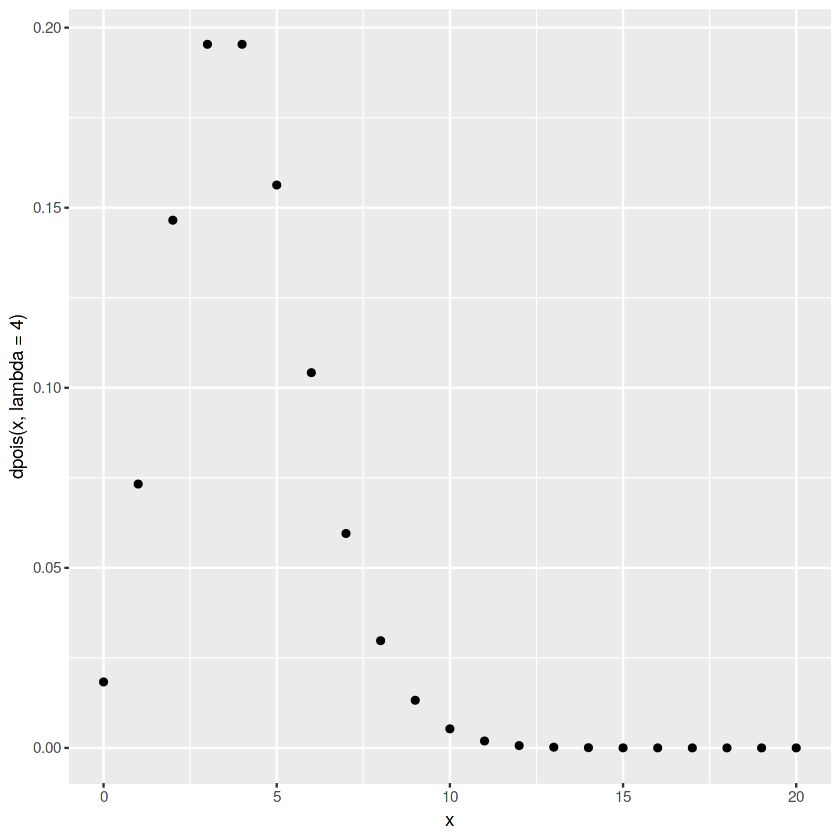

In [4]:
#graphical representation for 0 to 20 chips in a cookie when the expected number of chips is 4
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=dpois(x, lambda=4)))

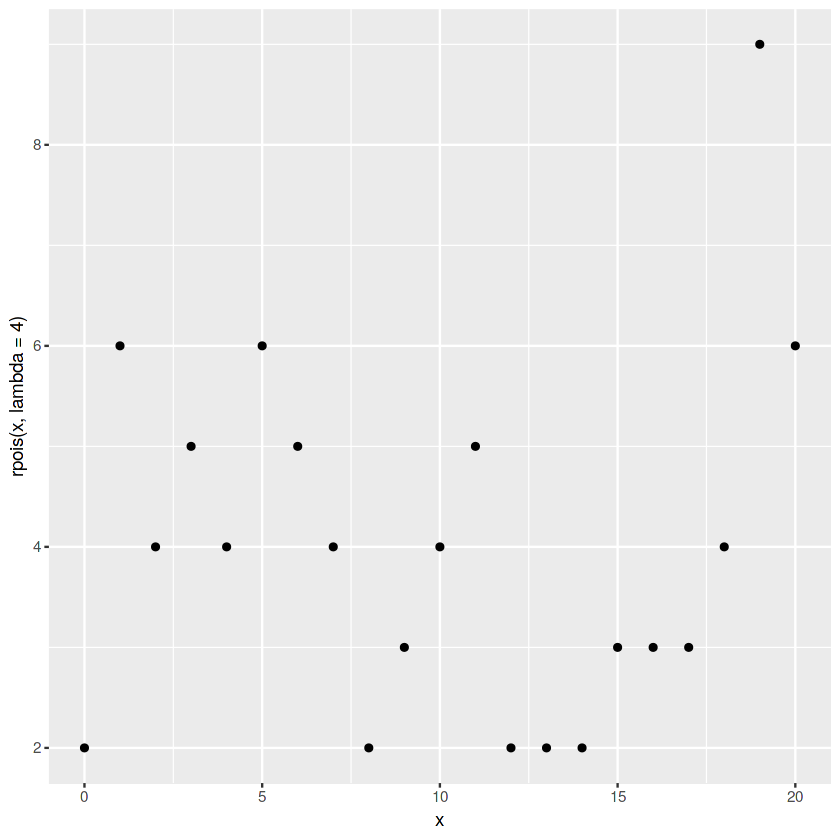

In [5]:
#20 random generations of poission distributions for a lambda of 4
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=rpois(x, lambda=4)))

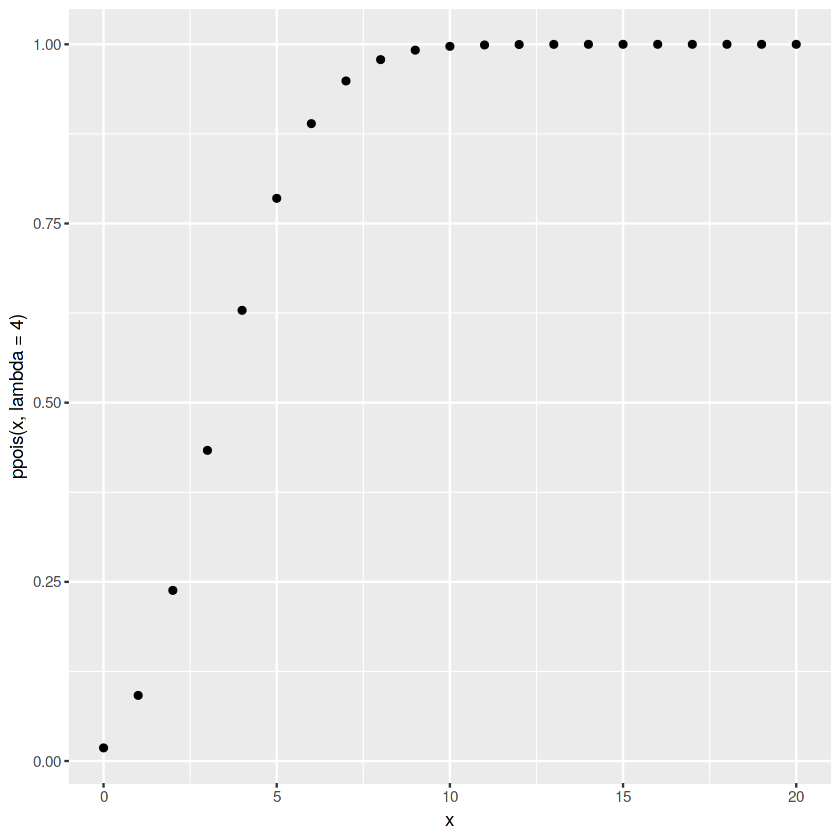

In [6]:
#this looks cumulative and only really tells us we've observed most probabilities
#after considering up to only 11 chips
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=ppois(x, lambda=4)))

<b>Binomial</b>

In [24]:
#if an event has a probability of 1/162, after 162 trials 36.6% of people get 0
pbinom(q=c(0:5),size=162,prob=1/162)

[1] 0.3667411 0.7357601 0.9202695 0.9813907 0.9964812 0.9994430

[1] 0.1344990208 0.2706688369 0.2715094233 0.1810062822 0.0902220755
 [6] 0.0358646760 0.0118435110 0.0033418248 0.0008224833 0.0001793683

[1] 0.366741081 0.369018976 0.184509488 0.061121155 0.015090472 0.002961857

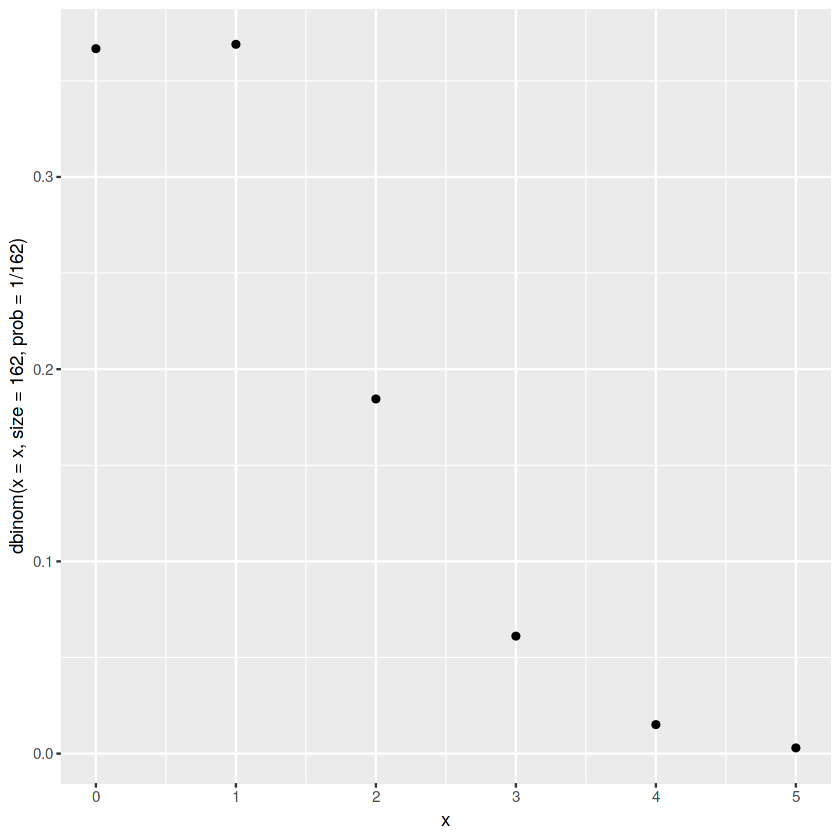

In [32]:
#different outcomes for 0 to 9 successes for a 1/162 probability
dbinom(x=c(0:9), size=324, prob=1/162, log = FALSE)

#the most likely outcomes with 162 events and a probability of 1/162 is 1
#closely followed by 0
ggplot(data.frame(x=c(0:5)), aes(x)) +
geom_point(aes(y=dbinom(x=x,size=162,prob=1/162)))
dbinom(x=c(0:5), size=162, prob=1/162, log = FALSE)

[1] 0.3667411 0.7357601 0.9202695 0.9813907 0.9964812

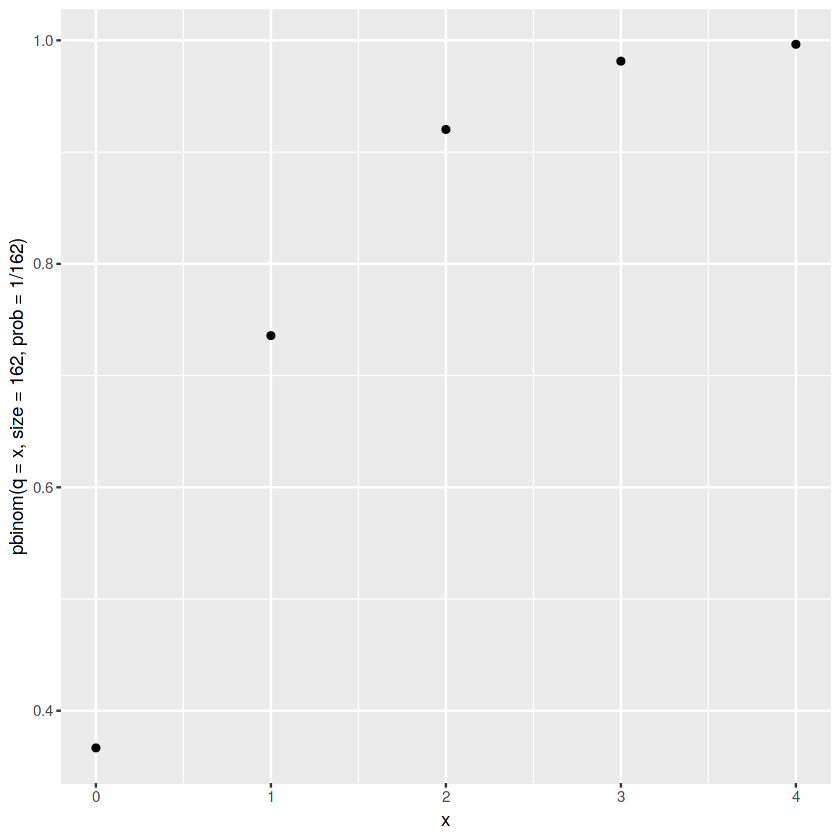

In [35]:
#effectively these are cumulative probabilities 
#for 0 successes, 0 or 1 sucesses, 0 or 1 or 2 etc...
pbinom(q=c(0:4),size=162,prob=1/162)

ggplot(data.frame(x=c(0:4)), aes(x)) +
geom_point(aes(y=pbinom(q=x,size=162,prob=1/162)))

In [37]:
help(binom.test)

In [51]:
#two sided test
binom.test(x=40, n=450, p = 1/450,
           alternative = c("t"),
           conf.level = 0.95)

#the null hypothesis (true probability really is 1/450) can be rejected
#since 0.00222222 is not in the 95% confidence interval of  0.06426273 0.11907394

#sample estimates: probability of success tells us the suspected real probability based on our input.
#the actual probability is expected to be 0.08888889


	Exact binomial test

data:  40 and 450
number of successes = 40, number of trials = 450, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.002222222
95 percent confidence interval:
 0.06426273 0.11907394
sample estimates:
probability of success 
            0.08888889 


In [52]:
#obvious example: given 40 successes in 450 trials, with an expected success rate of 1/450
#we have an alternative hypothesis that the probability is greater than 1/450
binom.test(x=40, n=450, p = 1/450,
           alternative = c("greater"),
           conf.level = 0.95)

#there is enough evidence to reject the null hypothesis  (that p = 1/450). 
#this is because 0.00222222 is not in the 95% confidence interval of  0.06777859 1.00000000


	Exact binomial test

data:  40 and 450
number of successes = 40, number of trials = 450, p-value < 2.2e-16
alternative hypothesis: true probability of success is greater than 0.002222222
95 percent confidence interval:
 0.06777859 1.00000000
sample estimates:
probability of success 
            0.08888889 


In [62]:
binom.test(x=2, n=300, p = 1/300,
           alternative = c("greater"),
           conf.level = 0.95)

#there is NOT enough evidence to support rejecting the null hypothesis
#because the probability (1/300) is in the interval  0.001185814 1.000000000


	Exact binomial test

data:  2 and 300
number of successes = 2, number of trials = 300, p-value = 0.2642
alternative hypothesis: true probability of success is greater than 0.003333333
95 percent confidence interval:
 0.001185814 1.000000000
sample estimates:
probability of success 
           0.006666667 


<b>Hypothesis Test with Possion</b>

In [ ]:
#EnvStats has some very specific hypothesis tests in it
#my_htest = chenTTest(EPA.02d.Ex.9.mg.per.L.vec, mu = 30)

In [ ]:
help(poisson.test)